#  <center><font color= 'blue'><b> Trading Analysis on Bank Customer  </b></font></center>
<center><font color= 'blue'><b>*****  **  *****</b></font></center>

---
### <p style='text-align: right; color:red'>- <u>ML by Mahesh Torgal</p>
---

---
# **Table of Contents**
---

**1.** [**Company Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Company Introduction**
---

- The client name is **AE Corp** who is a retail banking institution.
- They are going to float a stock trading facility for their existing customers.
- The idea is to use data to classify whether a customer belongs to a high net worth or low net worth group.
- They will have to incentivize their customers to adopt their offerings.
- One way to incentivize is to offer discounts on the commission for trading transactions.

<center><img width=10% src="https://www.bing.com/th?id=OIP.0tedQhMeBulqD0A0CsantAHaHa&w=250&h=250&c=8&rs=1&qlt=90&o=6&pid=3.1&rm=2"></center>

---
### **Current Scenario**

- The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2.

---
<a name = Section2></a>
# **2. Problem Statement**
---
The current process suffers from the following problems:
   - One issue is that only about 10% of the customers do enough trades for earnings after discounts to be profitable.
   - The company wants to figure out, which are those 10% customers so that it can selectively offer them a discount.
   
The marketing department has hired me as a data science consultant because they want to supplement their campaigns with a more proactive approach.

### My Role
- I have given datasets of past customers and their status (Revenue Grid 1 or 2).
- My task is to build a classification model using the datasets.
- Because there was no machine learning model for this problem in the company, I don’t have a quantifiable win condition. I need to build the best possible model.

### Project Deliverables
- Deliverable: Predict whether a customer belongs to a high net worth or low net worth group.
- Machine Learning Task: Classification
- Target Variable: Status (high net worth (1) / low net worth (2))
- Win Condition: N/A (best possible model)

### Evaluation Metric
- The model evaluation will be based on the F1 Score.

---
<a name = Section3></a>
# **3. Importing Libraries**
---

In [1]:
import pandas as pd                                                 # Importing for panel data analysis
import numpy as np                                                  # Importing package numpys (For Numerical Python)
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
from pandas_profiling import ProfileReport                          # To perform data profiling
%matplotlib inline

from sklearn.model_selection import train_test_split                # importing package to spit data
from sklearn.linear_model import LogisticRegression                 # importing Logistic regression package
from sklearn.preprocessing import StandardScaler                    # To scale input features of the model
from sklearn.metrics import accuracy_score                          # To calculate accuracy score of the model
from sklearn.metrics import recall_score                            # To calculate recall score of the model
from sklearn.metrics import f1_score                                # To calculate f1 score of the model

---
<a name = Section4></a>
# **4. Data Aquisition & Description**
---

In [2]:
df=pd.read_csv(r'C:\Users\Mahesh\Downloads\Customer-classification\existing_base_train.csv')
print(df.shape)
df.head()

(8124, 32)


,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


<a name = Section41></a>
### *4.1 Data Description*

In [3]:
df.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


<a name = Section42></a>
### *4.2 Data Information*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [5]:
df.corr()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
REF_NO,1.000000,0.026152,-0.003218,-0.006604,0.003851,0.010882,0.019814,-0.003665,-0.008298,-0.003864,0.006365,-0.016627,0.004514,0.005642,-0.004075,0.002685,0.002762,-0.019852
year_last_moved,0.026152,1.000000,0.014315,0.013267,0.006197,0.010292,0.012969,0.007945,0.017261,0.000847,0.013398,0.006490,0.010721,0.016565,0.016056,0.014580,0.017924,-0.019630
Average_Credit_Card_Transaction,-0.003218,0.014315,1.000000,0.122762,0.317612,0.142606,0.416773,0.178150,0.089357,0.147438,0.131641,0.103417,0.135466,0.494653,0.208564,0.227267,0.334657,-0.260559
Balance_Transfer,-0.006604,0.013267,0.122762,1.000000,0.225434,0.579267,0.162104,0.364480,0.390466,0.476061,0.152481,0.155322,0.103240,0.745051,0.482565,0.603648,0.655522,-0.068647
Term_Deposit,0.003851,0.006197,0.317612,0.225434,1.000000,0.277802,0.509060,0.274553,0.141514,0.200841,0.181591,0.179143,0.102339,0.617357,0.263169,0.348750,0.451947,-0.017412
Life_Insurance,0.010882,0.010292,0.142606,0.579267,0.277802,1.000000,0.231832,0.507877,0.411186,0.557926,0.257747,0.281339,0.117841,0.806732,0.572773,0.845890,0.792836,-0.201998
Medical_Insurance,0.019814,0.012969,0.416773,0.162104,0.509060,0.231832,1.000000,0.266829,0.101725,0.202282,0.215206,0.144905,0.149324,0.545814,0.267200,0.382948,0.433584,-0.102217
Average_A/C_Balance,-0.003665,0.007945,0.178150,0.364480,0.274553,0.507877,0.266829,1.000000,0.193468,0.437742,0.302556,0.377556,0.160302,0.517854,0.580203,0.637153,0.599855,-0.114258
Personal_Loan,-0.008298,0.017261,0.089357,0.390466,0.141514,0.411186,0.101725,0.193468,1.000000,0.424295,0.224014,0.125360,0.079820,0.403742,0.685400,0.703672,0.618259,0.022841
Investment_in_Mutual_Fund,-0.003864,0.000847,0.147438,0.476061,0.200841,0.557926,0.202282,0.437742,0.424295,1.000000,0.253396,0.254454,0.091961,0.546054,0.695245,0.774477,0.704382,-0.110020


C:\Users\Mahesh\AppData\Local\Temp\ipykernel_4700\770880571.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df.corr(), mask=np.triu(np.ones_like(df.corr(), dtype=np.bool)), vmin=0, vmax=1, annot=True, cmap='Blues')


<AxesSubplot:>

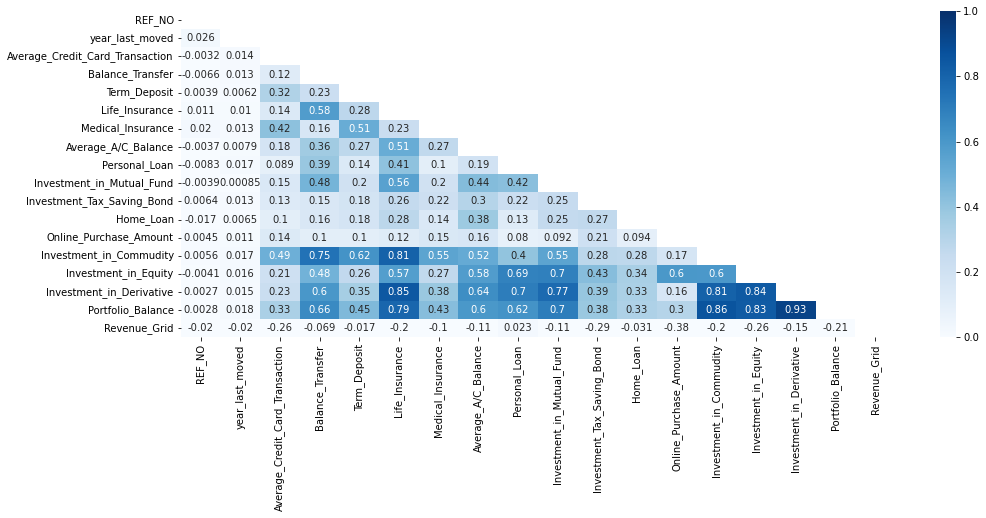

In [6]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), mask=np.triu(np.ones_like(df.corr(), dtype=np.bool)), vmin=0, vmax=1, annot=True, cmap='Blues')

# Data Wrangling

In [7]:
N_status=pd.get_dummies(df['status'], drop_first=True)
N_occupation=pd.get_dummies(df['occupation'], drop_first=True)
N_HomeStatus=pd.get_dummies(df['home_status'], drop_first=True)
N_region=pd.get_dummies(df['region'], drop_first=True)
N_gender=pd.get_dummies(df['gender'], drop_first=True)
N_SelfEmployed=df['self_employed'].replace({'Yes':1,'No':0})

In [8]:
ndf=pd.concat([df,N_status,N_occupation,N_SelfEmployed,N_HomeStatus,N_region,N_gender], axis=1)
print(ndf.shape)
ndf.head()

(8124, 63)


,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,North West,Northern Ireland,Scotland,South East,South West,Unknown,Wales,West Midlands,Male,Unknown
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,1,0,0,0,0,0,0,0,0,0
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,1,0,0,0,0,0,0,0,0,0
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0,0,0,0,1,0,0,0,0,0
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0,0,1,0,0,0,0,0,0,0
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0,0,0,0,0,1,0,0,0,0


In [9]:
ndf.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid',
       'Partner', 'Single/Never Married', 'Unknown', 'Widowed', 'Housewife',
       'Manual Worker', 'Other', 'Professional', 'Retired',
       'Secretarial/Admin', 'Student', 'Unknown', 'self_employed', 'Own Home',
       'Rent Privately', 'Rent from Council/HA', 'Unclassified', 'East Anglia',
       'East Midlands', 'Isle of Man', 'North', 

In [10]:
ndf.drop(['REF_NO', 'children', 'age_band','status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area','gender', 'region'], axis=1, inplace=True)

In [11]:
ndf.head()

,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,...,North West,Northern Ireland,Scotland,South East,South West,Unknown,Wales,West Midlands,Male,Unknown
0,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,...,1,0,0,0,0,0,0,0,0,0
1,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,0
2,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,...,0,0,0,0,1,0,0,0,0,0
3,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,...,0,0,0,0,0,1,0,0,0,0


# Testing Logistic Regretion

In [12]:
X = ndf.drop('Revenue_Grid',axis=1)
y = ndf['Revenue_Grid']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_frame = pd.DataFrame(data=X_scaled, columns=X.columns)
X_scaled_frame.head()

,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,...,North West,Northern Ireland,Scotland,South East,South West,Unknown,Wales,West Midlands,Male,Unknown
0,0.072909,-0.203502,5.264442,2.448627,2.182793,1.702048,1.762283,1.438028,0.230636,5.130457,...,2.086937,-0.129993,-0.286185,-0.510595,-0.323349,-0.345422,-0.238431,-0.296872,-0.569011,-0.061891
1,0.248882,0.359094,-0.504056,0.361772,-0.244725,0.367143,-0.110729,-0.647761,-0.477980,-0.444128,...,2.086937,-0.129993,-0.286185,-0.510595,-0.323349,-0.345422,-0.238431,-0.296872,-0.569011,-0.061891
2,-0.454617,-0.273432,-0.504056,-0.489553,-0.587945,-0.703655,-0.298336,-0.485369,-0.477980,-0.444128,...,-0.479171,-0.129993,-0.286185,-0.510595,3.092631,-0.345422,-0.238431,-0.296872,-0.569011,-0.061891
3,0.425050,-0.582739,-0.504056,-0.682125,0.348647,-0.703655,-0.298571,-0.647761,-0.477980,-0.444128,...,-0.479171,-0.129993,3.494246,-0.510595,-0.323349,-0.345422,-0.238431,-0.296872,-0.569011,-0.061891
4,-0.454617,-0.582739,-0.504056,-0.682125,-0.587945,-0.703655,-0.298571,-0.492821,-0.477980,-0.444128,...,-0.479171,-0.129993,-0.286185,-0.510595,-0.323349,2.895006,-0.238431,-0.296872,-0.569011,-0.061891


In [14]:
X_scaled_frame.columns

Index(['Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit',
       'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance',
       'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Partner',
       'Single/Never Married', 'Unknown', 'Widowed', 'Housewife',
       'Manual Worker', 'Other', 'Professional', 'Retired',
       'Secretarial/Admin', 'Student', 'Unknown', 'Own Home', 'Rent Privately',
       'Rent from Council/HA', 'Unclassified', 'East Anglia', 'East Midlands',
       'Isle of Man', 'North', 'North West', 'Northern Ireland', 'Scotland',
       'South East', 'South West', 'Unknown', 'Wales', 'West Midlands', 'Male',
       'Unknown'],
      dtype='object')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)

In [16]:
X_train.shape

(6499, 45)

In [17]:
X_test.shape

(1625, 45)

In [18]:
print(X_test[0])

[ 0.03399996 -0.5827393   0.7887528   0.33065162 -0.5879445   1.74823924
  0.11223707 -0.64776112  1.05919544  1.06314157 -0.20791845  0.05267549
  0.26712994  0.30901455  0.11289922  0.57147522 -0.34876164 -0.07034235
 -0.25880857 -0.3712346  -0.24244078 -0.23698575 -0.56180738 -0.53331686
 -0.46317526 -0.07628232 -0.2418711   0.28693925 -0.16089471 -0.18858434
 -0.07379393 -0.21027586 -0.28819367 -0.04300926 -0.24499159 -0.47917112
 -0.12999321 -0.28618476 -0.51059537 -0.32334923  2.89500645 -0.23843076
 -0.29687181 -0.56901127 -0.0618908 ]


In [19]:
y_train.shape

(6499,)

In [20]:
y_test.shape

(1625,)

In [21]:
reg= LogisticRegression()

In [22]:
reg.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_test_pred=reg.predict(X_test)

In [24]:
print(y_test)

380     2
3641    1
273     1
1029    2
684     2
       ..
3535    2
1643    2
6494    2
6       2
3175    2
Name: Revenue_Grid, Length: 1625, dtype: int64


In [25]:
print(y_test_pred)

[2 1 1 ... 2 2 1]


In [26]:
accuracy_score=accuracy_score(y_test, y_test_pred)
print('Training data accuracy score :', "{:.2%}".format(accuracy_score))

Training data accuracy score : 94.22%


In [27]:
recall_score=recall_score(y_test, y_test_pred)
print('Training data recall score :', "{:.2%}".format(recall_score))

Training data recall score : 65.43%


In [28]:
f1_score=f1_score(y_test, y_test_pred)
print('Training data f1 score :', "{:.2%}".format(f1_score))

Training data f1 score : 72.35%


# Implementing LR Model on provided data

In [29]:
df_test=pd.read_csv(r'C:\Users\Mahesh\Downloads\Customer-classification\existing_base_test.csv')
df_test.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,697,Zero,71+,Partner,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,...,45.97,0.00,0.00,0.00,Male,South West,40.48,15.07,28.40,83.05
1,7897,Zero,31-35,Partner,Unknown,Business Manager,Own Home,">=35,000",No,No,...,133.88,27.45,13.47,57.46,Male,South East,27.07,72.01,82.74,235.29
2,4729,Zero,71+,Partner,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,...,107.88,0.00,0.00,0.00,Female,South West,44.39,32.62,43.86,98.38
3,6914,1,22-25,Partner,Other,Other,Own Home,"<17,500, >=15,000",No,No,...,44.96,0.00,0.00,0.00,Female,Scotland,21.59,24.57,29.23,86.32
4,2795,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,...,33.96,6.99,17.93,5.45,Female,South East,53.66,16.22,32.89,102.99


In [30]:
t_status=pd.get_dummies(df_test['status'], drop_first=True)
t_occupation=pd.get_dummies(df_test['occupation'], drop_first=True)
t_HomeStatus=pd.get_dummies(df_test['home_status'], drop_first=True)
t_region=pd.get_dummies(df_test['region'])
t_gender=pd.get_dummies(df_test['gender'], drop_first=True)
t_SelfEmployed=df_test['self_employed'].replace({'Yes':1,'No':0})
tdf=pd.concat([df_test,t_status,t_occupation,t_SelfEmployed,t_HomeStatus,t_region,t_gender], axis=1)
tdf.drop(['REF_NO','children', 'age_band','status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area','gender', 'region'], axis=1, inplace=True)

In [31]:
scaler1 = StandardScaler()
tdf_scaled = scaler.fit_transform(tdf)
tdf_scaled_frame = pd.DataFrame(data=tdf_scaled, columns=tdf.columns)
tdf_scaled_frame.head()

,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,...,North West,Northern Ireland,Scotland,South East,South West,Unknown,Wales,West Midlands,Male,Unknown
0,0.357311,0.101504,-0.070869,-0.422480,0.867633,0.245578,-0.351399,0.018890,-0.470612,-0.468396,...,-0.478977,-0.109353,-0.304176,-0.510595,3.009062,-0.343186,-0.249476,-0.29441,1.752182,-0.044423
1,-0.486538,-0.628496,-0.540551,0.316881,0.440484,-0.077198,1.758354,1.443089,1.569752,0.862018,...,-0.478977,-0.109353,-0.304176,1.958498,-0.332329,-0.343186,-0.249476,-0.29441,1.752182,-0.044423
2,-0.486538,1.404369,-0.540551,-0.026103,-0.598639,1.179861,-0.351399,1.021872,-0.470612,-0.468396,...,-0.478977,-0.109353,-0.304176,-0.510595,3.009062,-0.343186,-0.249476,-0.29441,-0.570717,-0.044423
3,-0.105017,0.174017,-0.540551,-0.549249,-0.305560,-0.712622,0.917476,0.002528,-0.470612,-0.468396,...,-0.478977,-0.109353,3.287574,-0.510595,-0.332329,-0.343186,-0.249476,-0.29441,-0.570717,-0.044423
4,-0.486538,1.278425,-0.540551,0.565026,-0.598639,-0.001998,-0.351399,-0.175679,0.048956,1.302526,...,-0.478977,-0.109353,-0.304176,1.958498,-0.332329,-0.343186,-0.249476,-0.29441,-0.570717,-0.044423


In [32]:
tdf_scaled_frame.columns

Index(['Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit',
       'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance',
       'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Partner',
       'Single/Never Married', 'Unknown', 'Widowed', 'Housewife',
       'Manual Worker', 'Other', 'Professional', 'Retired',
       'Secretarial/Admin', 'Student', 'Unknown', 'Own Home', 'Rent Privately',
       'Rent from Council/HA', 'Unclassified', 'East Anglia', 'East Midlands',
       'Isle of Man', 'North', 'North West', 'Northern Ireland', 'Scotland',
       'South East', 'South West', 'Unknown', 'Wales', 'West Midlands', 'Male',
       'Unknown'],
      dtype='object')

In [33]:
ttdf=tdf_scaled_frame.values

In [34]:
test_pred=reg.predict(ttdf)

In [35]:
print(test_pred)

[2 2 2 ... 1 1 2]


In [75]:
index1=df_test['REF_NO']
index1

REF_NO
697      697
7897    7897
4729    4729
6914    6914
2795    2795
        ... 
4952    4952
7348    7348
3903    3903
4767    4767
5208    5208
Name: REF_NO, Length: 2031, dtype: int64

In [90]:
result=pd.DataFrame(test_pred,index=index1)

In [97]:
result.rename(columns={0:"Result_Revenue_Grid"}, inplace=True)

In [98]:
result

,Result_Revenue_Grid
REF_NO,
697,2
7897,2
4729,2
6914,2
2795,2
...,...
4952,2
7348,2
3903,1


In [101]:
result.to_csv('C:/Users/Mahesh/Downloads.result.csv', index=False, header=False)